In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import time as ttime

In [1]:
%autosave 0

Autosave disabled


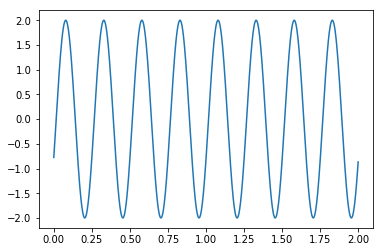

In [211]:
srate = 50
ampl = 2
freq = 4
phas = 75
time = np.arange(0,2,1/srate)
sw = ampl*np.sin(2*np.pi*freq*time + phas)

plt.plot(time,sw)

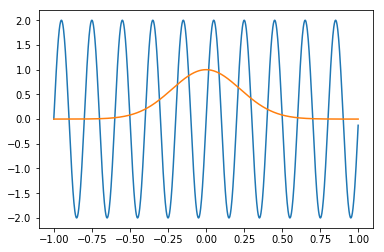

In [73]:
# Create a signal
srate=500
time=np.arange(-1.,1.,1./500)
sw = 2*np.sin(2*np.pi*5*time)

plt.plot(time,sw)
gau_sig = np.exp((-time**2)/0.1)
plt.plot(time,gau_sig)

signal = np.multiply(sw,gau_sig)

In [74]:
print(len(time))

1000


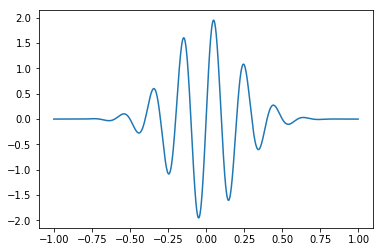

In [75]:
plt.plot(time,signal)

In [76]:
sinefrex = np.arange(2.,10.,.5)
print(len(sinefrex),sinefrex)

16 [2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5]


In [77]:
dps = np.zeros(len(sinefrex))
for fi in range(1,len(sinefrex)):
    #print(time)
    sinew = np.sin(2*np.pi*sinefrex[fi]*time)
    dps[fi] = np.dot(sinew,signal)/len(time)

<StemContainer object of 3 artists>

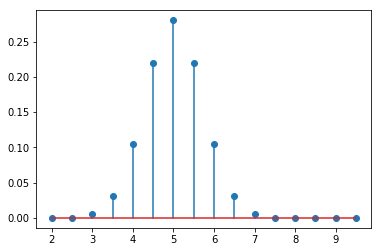

In [78]:
plt.stem(sinefrex,dps)

Excercise Solutions

Write python code to generate and plot two-second signals that comprise a sum of the following
sine wave parameters. Test various sampling rates, ranging from 1 Hz to 1000 Hz, to determine
what—if any—effect that has on the plots.
a)
f = 2 p = 0 a = 1
f = 4.2 p = 3pi/4 a = 1.7
b)
f = 200 p = 0 a = 100
f = 402 p = 0 a = 10
f = 3.2 p = 1 a = 50

In [162]:
srate = 20
t=np.arange(0,2,1/srate)

In [163]:
s1=1  *np.sin(2*np.pi*2  *t + 0)
s2=1.7*np.sin(2*np.pi*4.2*t + 0)
s12 = s1+s2

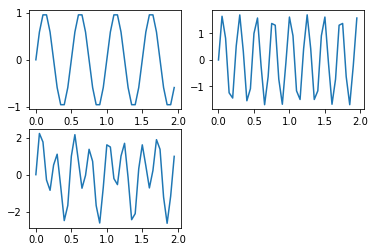

In [164]:
plt.subplot(2,2,1)
plt.plot(t,s1)
plt.subplot(2,2,2)
plt.plot(t,s2)
plt.subplot(2,2,3)
plt.plot(t,s12)


Computing Fourier Coeff for a sample signal

In [236]:
file='/Users/jm186072/Documents/DataScience/Udemy Courses/Fourier Transform/Alesis-Fusion-Clean-Guitar-C3.wav'

/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


numpy signal shape (393566,)


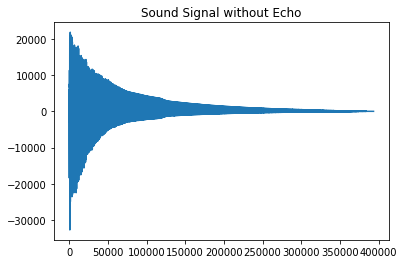

In [327]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.io.wavfile import write
spf = wave.open(file,'r')
signal = spf.readframes(-1)
signal = np.fromstring(signal,'Int16')
print('numpy signal shape',signal.shape)

plt.plot(signal)
plt.title("Sound Signal without Echo")
plt.show()

In [322]:
import wave
import sys
from scipy.io.wavfile import write
from scipy.io.wavfile import read as read_wav

/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


numpy signal shape (196783, 2) Sampling Rate:= 44100


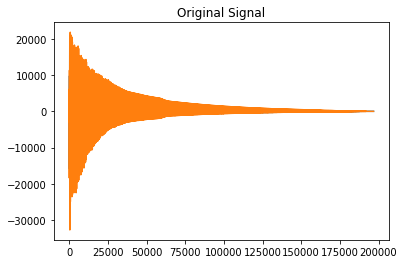

In [323]:
sampling_rate, signal=read_wav(file)

print('numpy signal shape',signal.shape, "Sampling Rate:=",sampling_rate)

plt.title("Original Signal")

plt.plot(signal)
plt.show()


In [278]:
## The DTFT in loop-form



393372


In [283]:
print(len(signal),len(fourTime))

393566 393372


In [268]:
fourTime.shape


(396900,)

In [328]:
# create the signal
srate  = 44100 # hz
time   = np.arange(0.,8.92438999,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
#signal = 2.5 * np.sin( 2*np.pi*4*time ) + 1.5 * np.sin( 2*np.pi*6.5*time )
signal = signal/2

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros((len(signal)),dtype=complex)


In [ ]:
for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    print(fi)
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs[fi] = np.sum( np.multiply(signal,csw) ) / pnts
    
    

In [ ]:
# extract amplitudes
ampls = 2*np.abs(fCoefs)

In [ ]:
# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

(Text(0.5,0,'Frequency (Hz)'), Text(0,0.5,'Amplitude (a.u.)'))

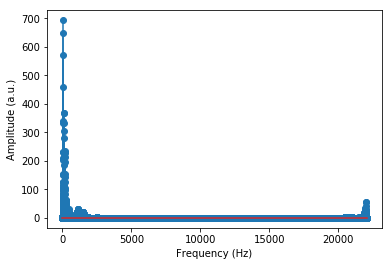

In [341]:
plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
#plt.xlim(0,10)
#plt.show()


In [331]:
len(ampls)

393566

In [332]:
ampls

array([0.75838868, 1.08065085, 1.02233183, ..., 0.98518947, 1.02233183,
       1.08065085])

In [342]:
len(hz)

196784

In [335]:
ampls[0]

0.7583886819491522

In [336]:
ampls.max()

693.2995616298065

In [337]:
np.argmax(ampls)

583

In [338]:
ampls[583]

693.2995616298065

In [340]:
hz[693]

77.65228703698999

(9, 21)

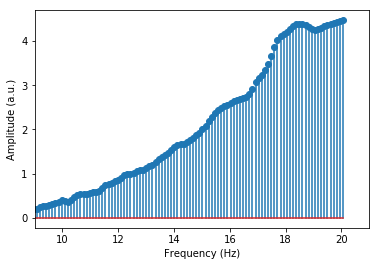

In [389]:
plt.stem(hz[80:180],ampls[range(80,180)])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(9,21)